In [1]:
import numpy as np
import random
import time
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# problem given as a list of cities and their position given by cartesian coordinates

def swap(l, index_1, index_2):
    l_copy = l[:] # list passed as reference, work with a copy instead
    tmp = l_copy[index_1]
    l_copy[index_1] = l[index_2]
    l_copy[index_2] = tmp
    
    return l_copy


def cost_edge(x1, x2):
    return np.linalg.norm(np.array([x1[0] - x2[0], x1[1] - x2[1]]))

# assume element of l has form (ID, [x, y]). Cost is sum of lengths between points. 
def cost_tour(l):
    return sum([cost_edge(l[i][1], l[(i+1) % len(l)][1]) for i in range(len(l))])

rand = random.Random()

# let neighborhood be defined by the solutions that can be
# obtained by swapping two cities in current solution
def random_neighbor_solution(l):
    length = len(l)
    i = rand.randint(0, length-1)
    j = rand.randint(0, length-1)
    
    while i == j:
        j = rand.randint(0, length-1)
        
    return swap(l, i, j)

def p(delta, t):
    return np.exp( -delta / t )

# simulated annealing 
def sa(s0, t0, a, stopcriterion_sec, neighborhood_f = None):
    # initialize variables
    sec0 = int(time.time())
    sec_now = int(time.time())
    s_best = s0[:]
    cost_best = cost_tour(s_best)
    s_cur = s0[:]
    cost_cur = cost_tour(s_cur)
    t = t0
    
    # does not matter if < or <= if 0 then new solution will be selected no matter what     
    while sec_now - sec0 < stopcriterion_sec:
        s_tmp = neighborhood_f(s_cur)
        cost_tmp = cost_tour(s_tmp)
        delta = cost_tmp - cost_cur
        
        # accept randomly drawn solution from current neighborhood if better or with some probability
        if delta <= 0 or p(delta, t) > rand.uniform(0.0, 1.0):
            s_cur = s_tmp
            cost_cur = cost_tmp
            
            # keep track of the best solution 
            if cost_cur < cost_best:
                s_best = s_cur
                cost_best = cost_cur
        
        # update temperature 
        t = t * a
        
        # update sec
        sec_now = int(time.time())
    
    return s_best, cost_best 
            

In [3]:
# dataset available at https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html

cities_id = []
with open("cities.txt") as f:
        for line in f.readlines():
            cities_id.append(line[0:len(line)-1])

cities_xy = []
with open("cities_xyz.txt") as f:
    for line in f.readlines():
        cities_xy.append([float(line[4:14]), float(line[19:30])])

In [4]:
cities =[(city, xy) for city, xy in zip(cities_id, cities_xy)]

In [5]:
s_best, cost_best = sa(cities, 1000, 0.99, 60, neighborhood_f = random_neighbor_solution)

/tmp/ipykernel_41286/1172619049.py:34: RuntimeWarning: overflow encountered in double_scalars
  return np.exp( -delta / t )


In [6]:
# s0 graph

G0=nx.Graph()
for i,city in enumerate(cities):
    G0.add_node(city[0])

for city in cities:
    G0.nodes[city[0]]['pos'] = (city[1][0],city[1][1])

for i, city in enumerate(cities):
    G0.add_edge(cities[i][0], cities[(i+1)%30][0])
    
node_pos=nx.get_node_attributes(G0,'pos')
cost_0 = cost_tour(cities)

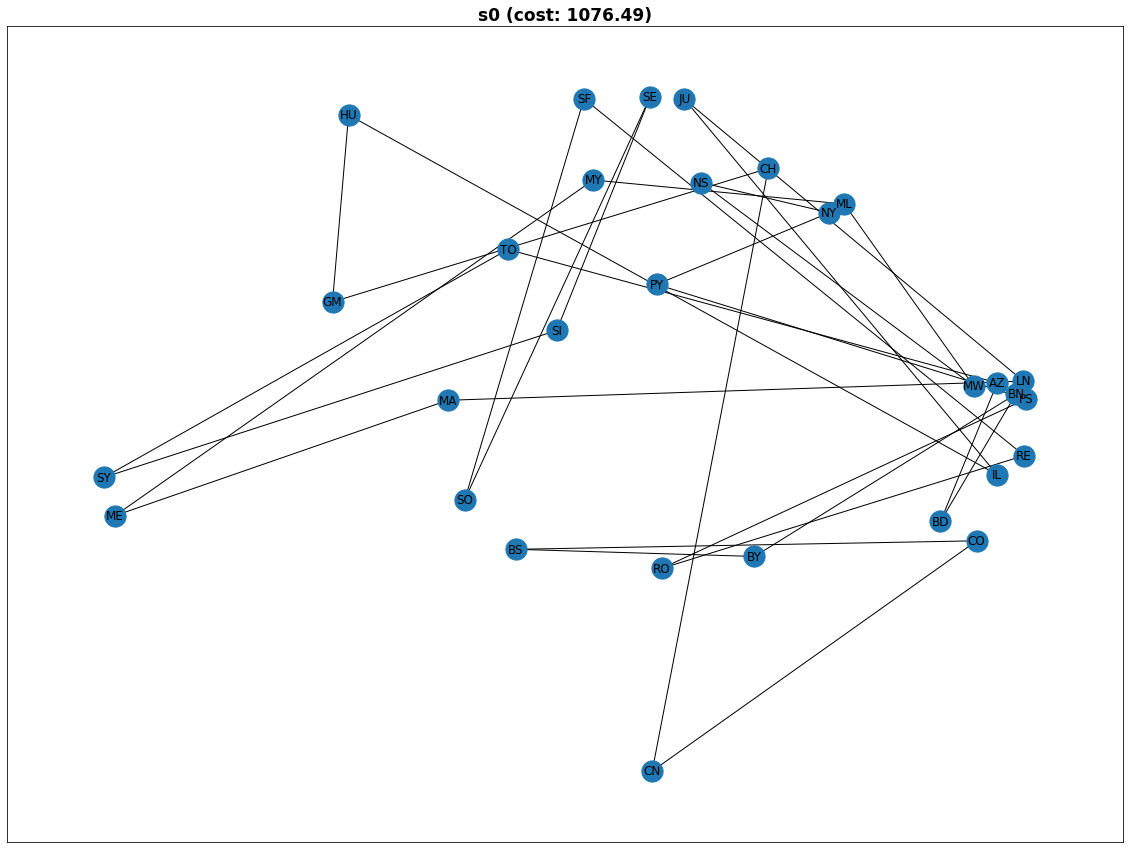

In [7]:
# draw s0
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('s0 (cost: ' + format(cost_0, '.2f') + ')', fontsize=17, fontweight="bold")
nx.draw_networkx(G0, node_pos, node_size=450)


In [8]:
#s_best graph

G_best=nx.Graph()
for i,city in enumerate(cities):
    G_best.add_node(city[0])
for city in cities:
    G_best.nodes[city[0]]['pos'] = (city[1][0],city[1][1])

for i, city in enumerate(s_best):
    G_best.add_edge(s_best[i][0], s_best[(i+1)%30][0])

node_pos=nx.get_node_attributes(G_best,'pos')

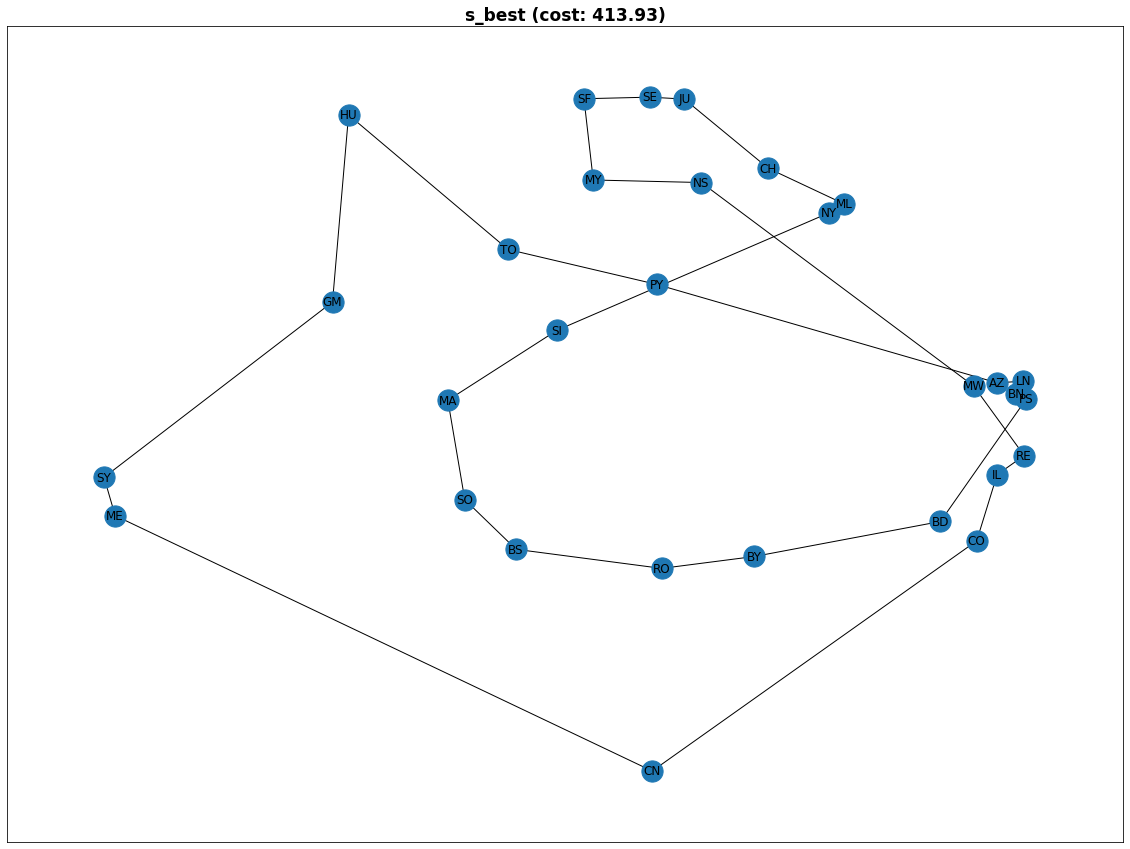

In [9]:
#draw s_best
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('s_best (cost: ' + format(cost_best, '.2f') + ')', fontsize=17, fontweight="bold")
nx.draw_networkx(G_best, node_pos, node_size=450)

In [10]:
print("cost of s0: ", cost_tour(cities))
print("cost of s_best: ", cost_tour(s_best))

cost of s0:  1076.489148072533
cost of s_best:  413.93087580500776
